## Final Project 

### VaR and CVaR calculation using ARIMA model to predict prices

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [147]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [148]:
def autocorr_plots(y, lags=20, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    return fig, ax

In [149]:
# Read the data as AAPL

aapl = pd.read_csv("C:/Users/Gladys/Documents/1.Data Science Course/Final project/data/AAPL.csv")

In [150]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,125.080002,125.349998,123.940002,124.279999,123.573997,67637100
1,2021-06-02,124.279999,125.239998,124.050003,125.059998,124.349556,59278900
2,2021-06-03,124.680000,124.849998,123.129997,123.540001,122.838203,76229200
3,2021-06-04,124.070000,126.160004,123.849998,125.889999,125.174850,75169300
4,2021-06-07,126.169998,126.320000,124.830002,125.900002,125.184792,71057600


In [151]:
aapl = aapl[["Date","Adj Close"]]  #Take relevant columns
aapl.head()

,Date,Adj Close
0,2021-06-01,123.573997
1,2021-06-02,124.349556
2,2021-06-03,122.838203
3,2021-06-04,125.174850
4,2021-06-07,125.184792


In [152]:
aapl.rename(columns={"Date":"date","Adj Close":"price"}, inplace=True) #Rename columns
aapl.head(10)

,date,price
0,2021-06-01,123.573997
1,2021-06-02,124.349556
2,2021-06-03,122.838203
3,2021-06-04,125.174850
4,2021-06-07,125.184792
5,2021-06-08,126.020012
6,2021-06-09,126.407799
7,2021-06-10,125.393600
8,2021-06-11,126.626549
9,2021-06-14,129.738770


In [153]:
aapl.info() #check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    252 non-null    object 
 1   price   252 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [154]:
# Set date column as index

aapl.set_index('date', inplace=True, drop=True) 

In [155]:
aapl.head(4)

,price
date,
2021-06-01,123.573997
2021-06-02,124.349556
2021-06-03,122.838203
2021-06-04,125.174850


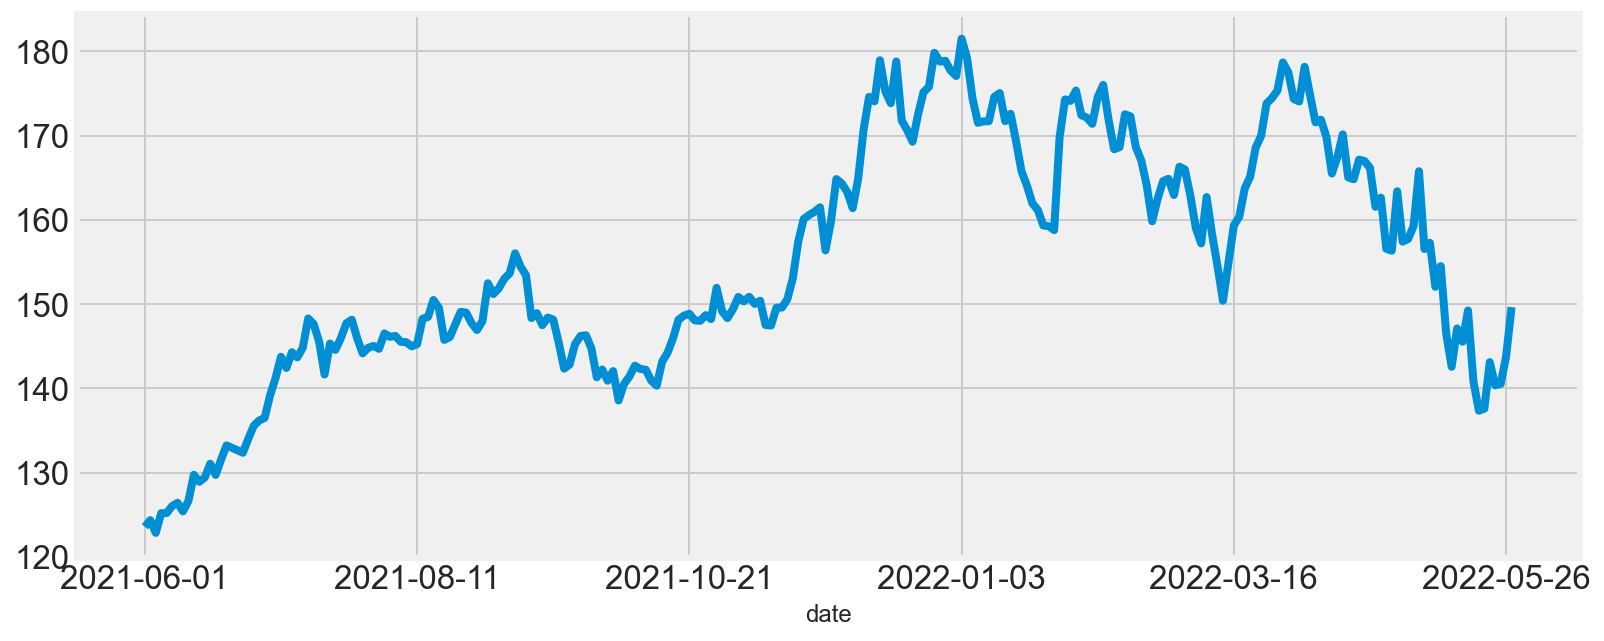

In [156]:
# prices plot

aapl['price'].plot(lw=4, figsize=(12, 5))
plt.show()

In [157]:
# Define variable price
price = aapl.price

price

date
2021-06-01    123.573997
2021-06-02    124.349556
2021-06-03    122.838203
2021-06-04    125.174850
2021-06-07    125.184792
                 ...    
2022-05-23    143.110001
2022-05-24    140.360001
2022-05-25    140.520004
2022-05-26    143.779999
2022-05-27    149.639999
Name: price, Length: 252, dtype: float64

In [158]:
# variable price defferentiated once to get stationary time series
price_diff = price.diff()[1:]

price_diff.head()

date
2021-06-02    0.775559
2021-06-03   -1.511353
2021-06-04    2.336647
2021-06-07    0.009942
2021-06-08    0.835220
Name: price, dtype: float64

#### ADF test

In [159]:
#Augmented Dickey-Fuller unit root test.


#The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process 
#in the presence of serial correlation.

#H0: P-value > significance level ==> unit root then time series is NOT stationary
#H1:  P-value < significance level ==>  time series IS stationary

# Significance level 0.05

from statsmodels.tsa.stattools import adfuller


In [160]:
result = adfuller(price)
print ("p-value: %f" % result[1]) 
# P-value > 0.05 ==> unit root then time series is NOT stationary

p-value: 0.156088


In [161]:
result = adfuller(price_diff)
print ("p-value: %f" % result[1]) # P-value < significance level ==>  time series IS stationary 


p-value: 0.000001


### d = 1

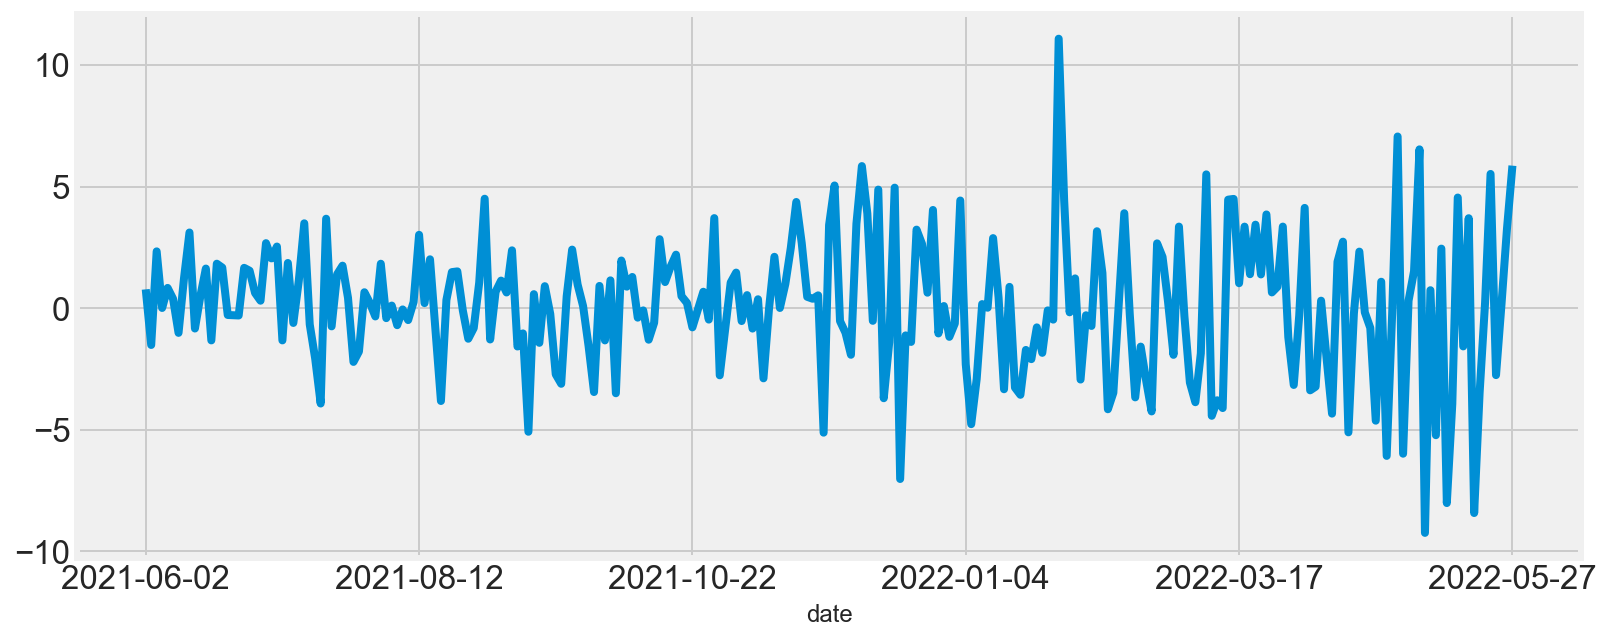

In [162]:
# the difference timeseries  

price_diff.plot(lw=4, figsize=(12, 5))
plt.show()

### Autocorrelation Function (ACF)

<function matplotlib.pyplot.show(close=None, block=None)>

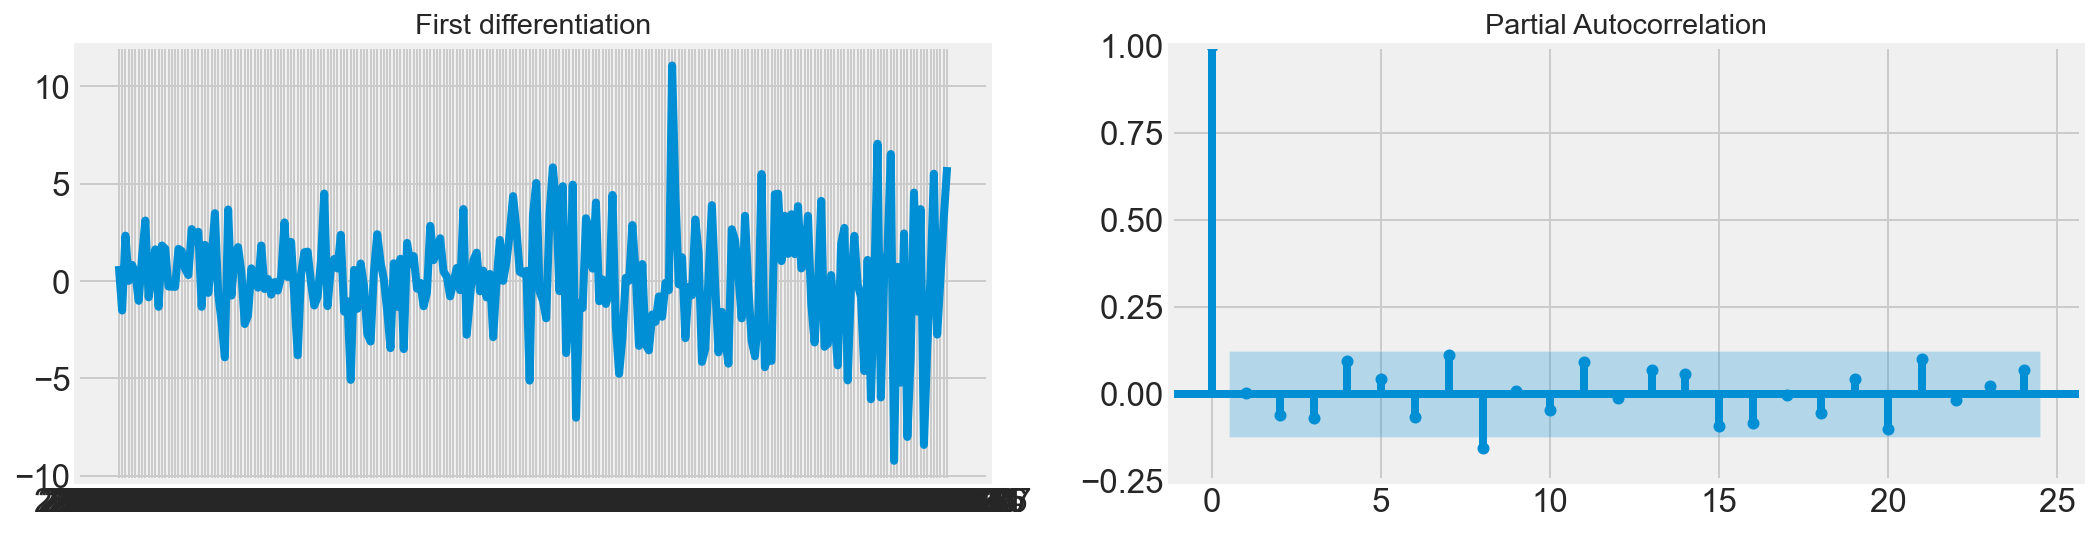

In [169]:
#Plot partial Autocorrelation to get p. p = number of lags crossing the significant limit.

fig, axes = plt.subplots(1,2,figsize=(16,4))
axes[0].plot(price_diff); axes[0].set_title("First differentiation")
axes[1].set(ylim=(-0.25,1))
plot_pacf(price_diff,ax=axes[1])
plt.show

### p = 1

<function matplotlib.pyplot.show(close=None, block=None)>

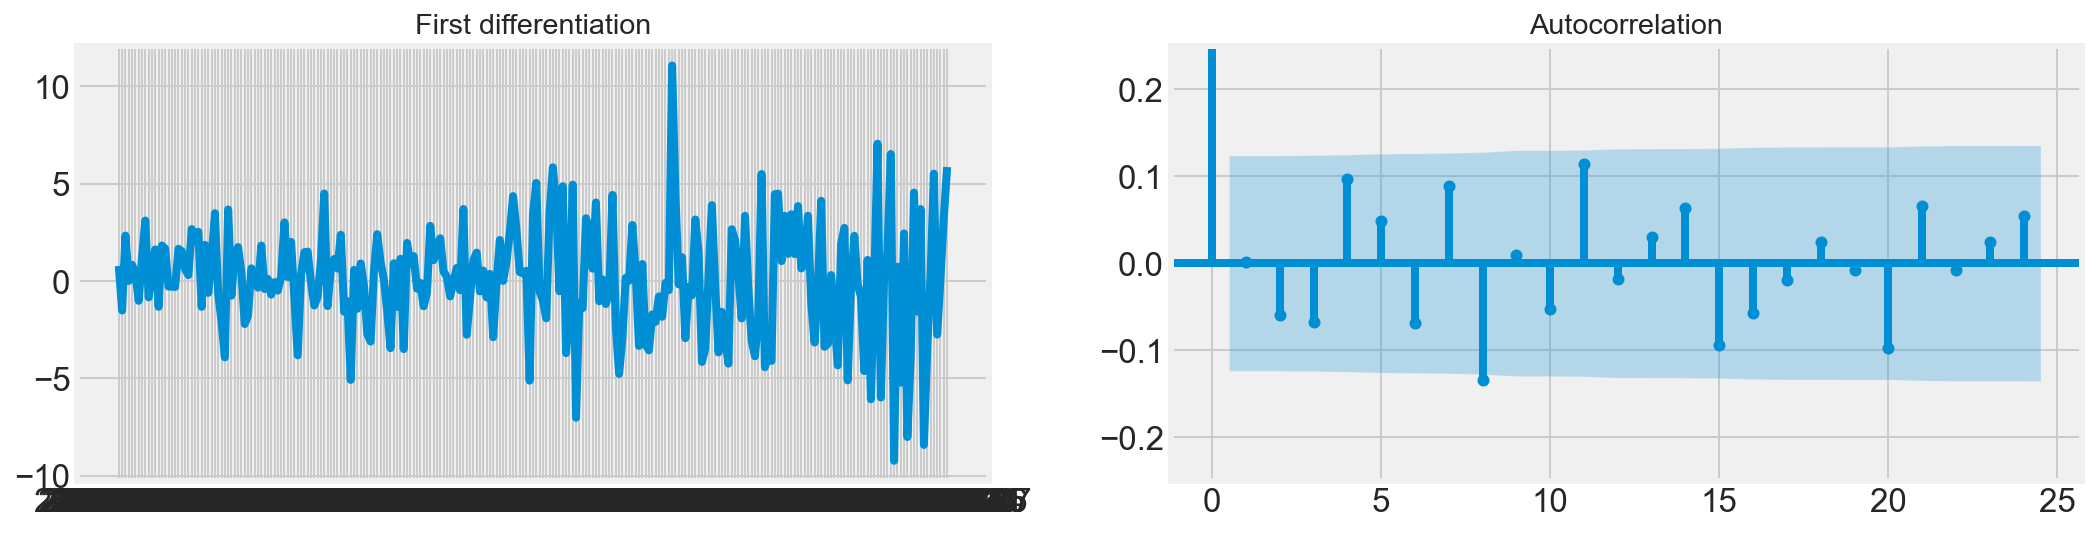

In [173]:
#Plot simple Autocorrelation to get q. q = number of lags crossing the significant limit.

fig, axes = plt.subplots(1,2,figsize=(16,4))
axes[0].plot(price_diff); axes[0].set_title("First differentiation")
axes[1].set(ylim=(-0.25,0.25))
plot_acf(price_diff,ax=axes[1])
plt.title("Autocorrelation")
plt.show

### q = 1

### Fitting ARIMA models

In [231]:
#ARIMA (1,1,1) with variable price

model = sm.tsa.arima.ARIMA(price, order=(1, 1, 1))

results = model.fit()

results.summary()

C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive par

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -614.617
Date:                Sun, 26 Jun 2022   AIC                           1235.233
Time:                        17:13:20   BIC                           1245.809
Sample:                             0   HQIC                          1239.489
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2801      4.256     -0.066      0.948      -8.622       8.062
ma.L1          0.2910      4.239      0.069      0.945      -8.018       8.600
sigma2         7.8424      0.588     13.327      0.000       6.689       8.996
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                13.63
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               4.49   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Ljung-Box : if prob(Q) > 0.05 = significance level then the residuals are independent which is needed for the model to be correct.
#Coef : if p < 0.05 = significance level then the coefficient is statistically significant.
#JB - p<0.05 allows you to state with 95% confidence the data does not fit the normal distribution  

In [232]:
results.fittedvalues

date
2021-06-01      0.000000
2021-06-02    123.574008
2021-06-03    124.358032
2021-06-04    122.819160
2021-06-07    125.206027
                 ...    
2022-05-23    137.594647
2022-05-24    143.169207
2022-05-25    140.312600
2022-05-26    140.535555
2022-05-27    143.811239
Length: 252, dtype: float64

In [233]:
results.mse

68.40801002670625

C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


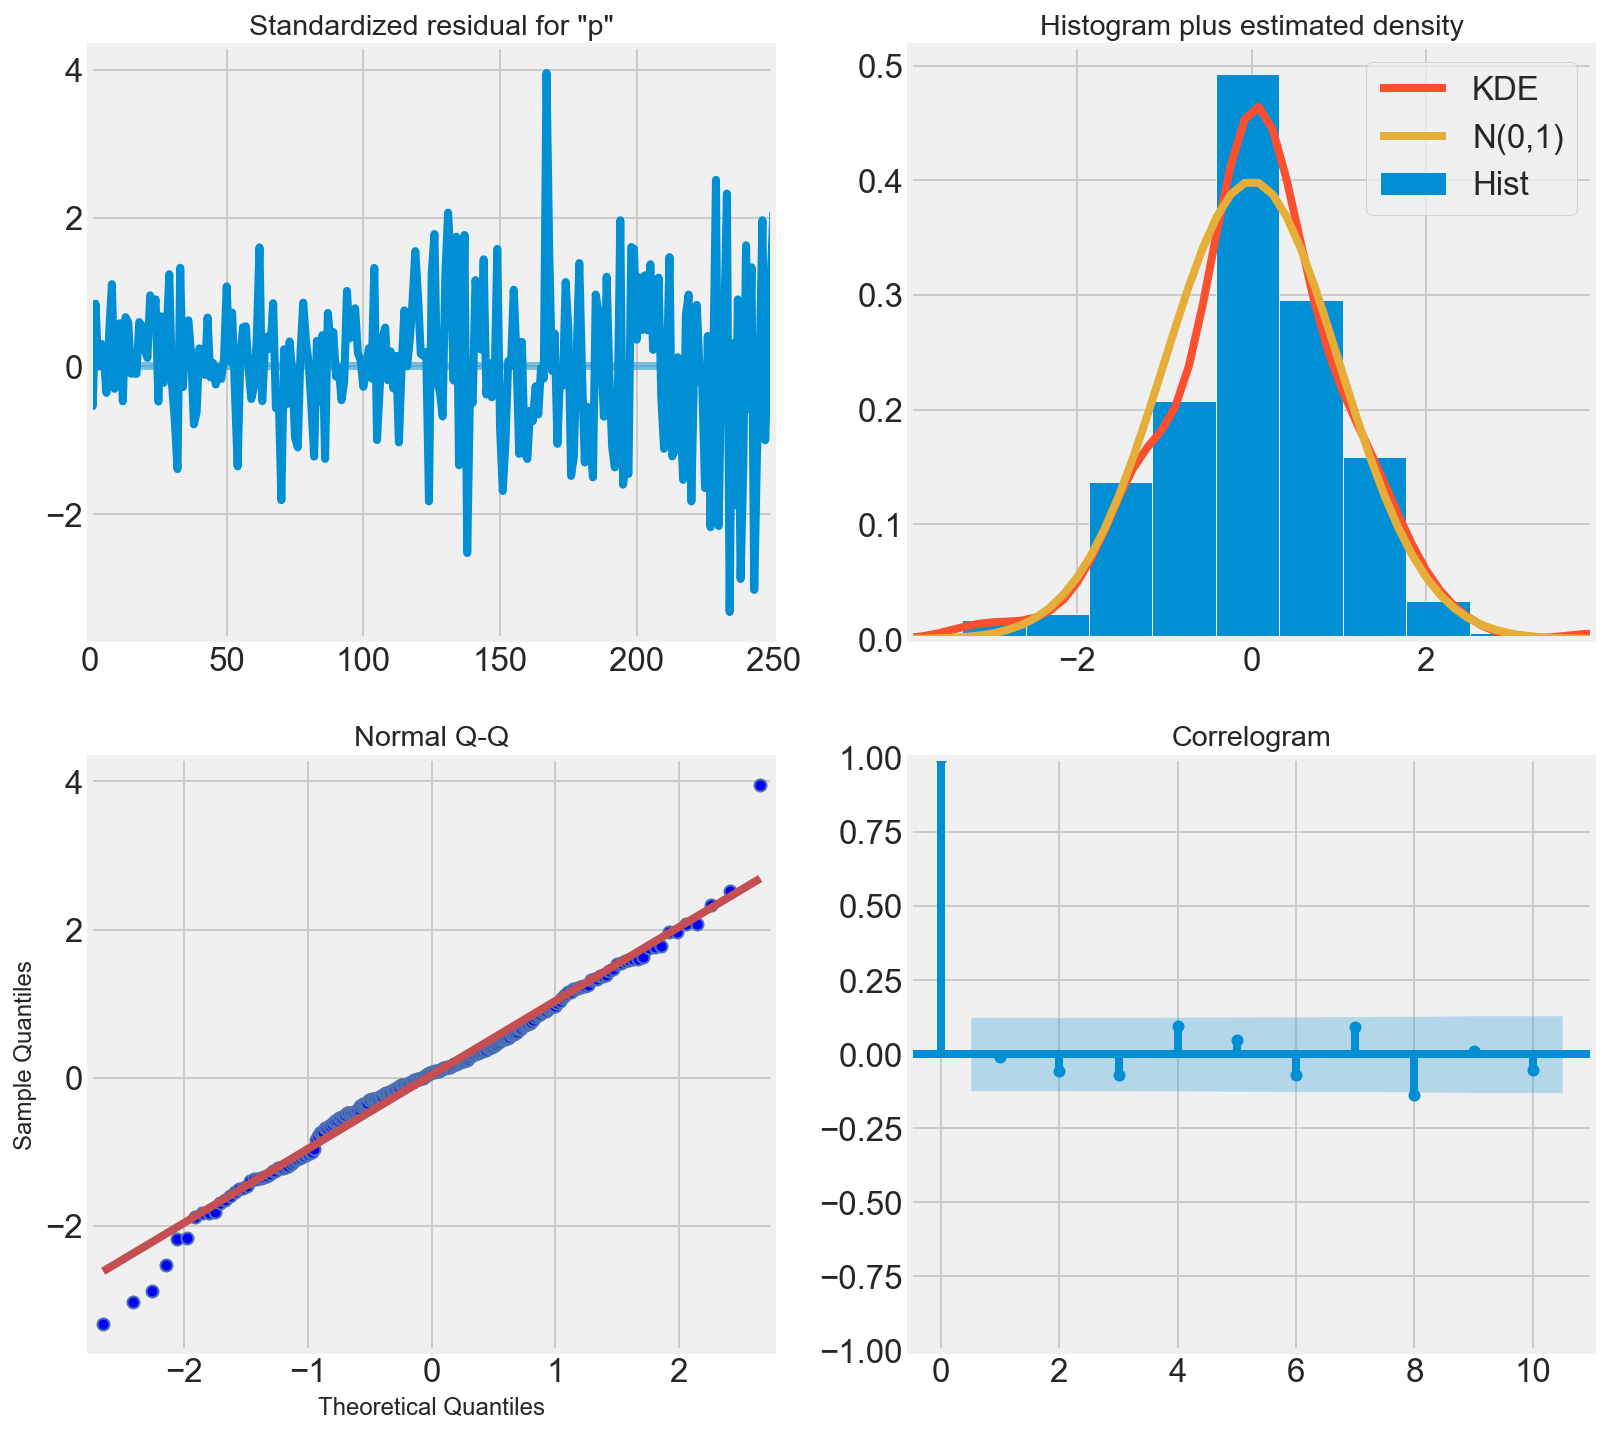

In [234]:
# Residuals with constant mean and variance

results.plot_diagnostics(figsize=(12, 12))

plt.show()

In [235]:

# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values

preds = results.predict(start=0, end=len(price)+50, dynamic=False)

preds_dyn = results.predict(start=len(price)-start_p,
                            end=len(price)+50, dynamic=True)


C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


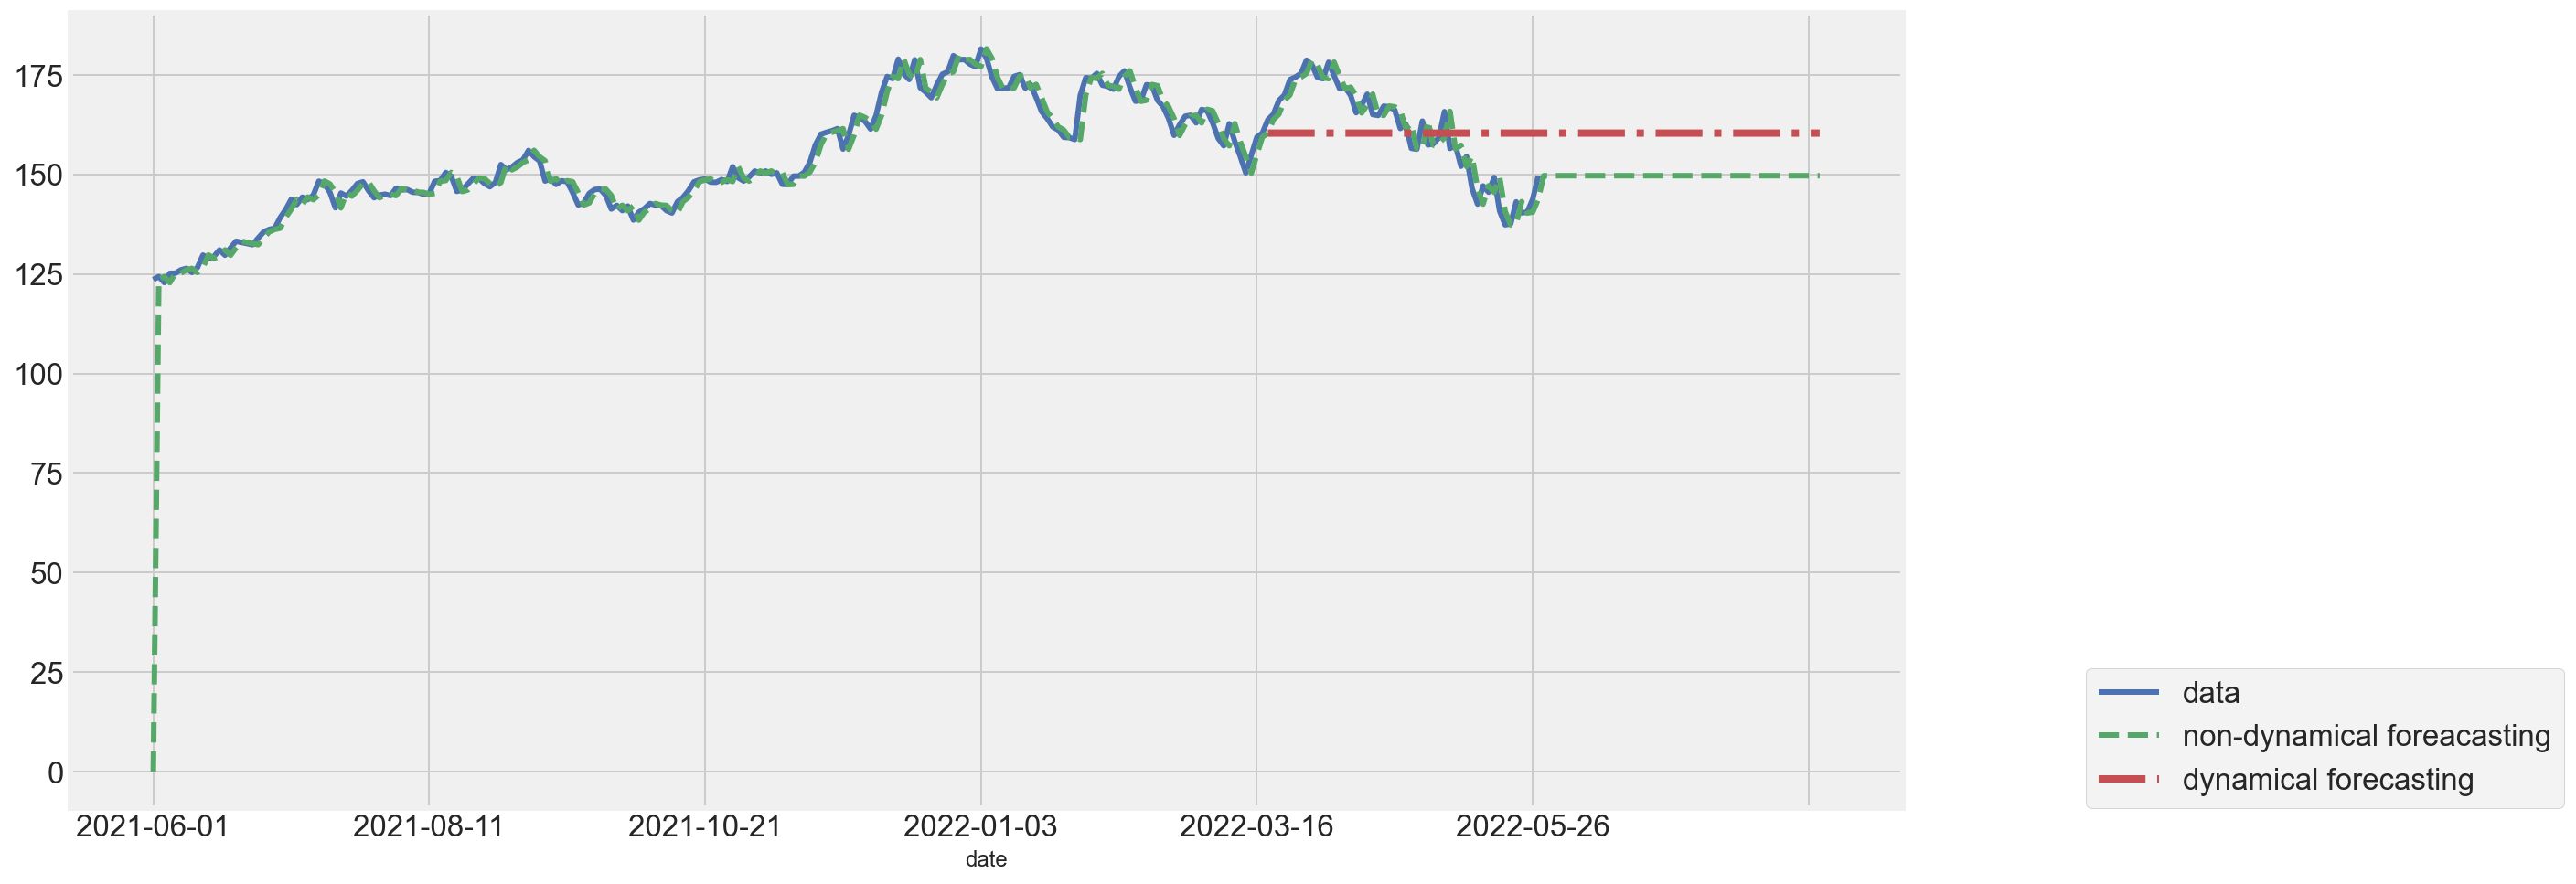

In [236]:
fig, ax = plt.subplots(figsize=(16, 8))

price.plot(c='b', label='data', lw=3, ax=ax)

#non dynamic prediction
preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)

#dynamic predictions
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

In [238]:
price.head(5)

date
2021-06-01    123.573997
2021-06-02    124.349556
2021-06-03    122.838203
2021-06-04    125.174850
2021-06-07    125.184792
Name: price, dtype: float64

In [237]:
results.fittedvalues

date
2021-06-01      0.000000
2021-06-02    123.574008
2021-06-03    124.358032
2021-06-04    122.819160
2021-06-07    125.206027
                 ...    
2022-05-23    137.594647
2022-05-24    143.169207
2022-05-25    140.312600
2022-05-26    140.535555
2022-05-27    143.811239
Length: 252, dtype: float64

## Cross Validation

In [240]:
from statsmodels.tsa.arima_model import ARIMA

In [241]:
# I will use 80% for train and 20% for test

X = price
# Create Training and Test
train = X[:202]
test = X[202:]

In [244]:
train.count()

202

In [245]:
test.count()

50

In [246]:
model_trained = ARIMA(train, order=(1,1,1))
model_fitted = model_trained.fit(disp = -1)

C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gladys\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

In [255]:
print(model_fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  201
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -462.069
Method:                       css-mle   S.D. of innovations              2.410
Date:                Sun, 26 Jun 2022   AIC                            932.137
Time:                        18:11:11   BIC                            945.350
Sample:                             1   HQIC                           937.484
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1855      0.179      1.037      0.300      -0.165       0.536
ar.L1.D.price    -0.8146      0.123     -6.633      0.000      -1.055      -0.574
ma.L1.D.price     0.9108      0.089     

In [ ]:
#Coef : if p < 0.05 = significance level then the coefficient is statistically significant.All coefficients are statistically significant.
#AIC, BIC, HQIC lower that the previous model ==> better model


In [263]:
#.forecast returns:
#Array of out of sample forecasts

#stderr:
#Array of the standard error of the forecasts.

#conf_intnd
#2d array of the confidence interval for the forecast

forecast,stderr,conf_int = model_fitted.forecast(252, alpha=0.05)  # 95% conf

In [264]:
forecast

array([161.0287, 160.8405, 161.3305, 161.2681, 161.6556, 161.6766,
       161.9962, 162.0726, 162.3471, 162.4602, 162.7047, 162.8422,
       163.0669, 163.2206, 163.4321, 163.5965, 163.7993, 163.9708,
       164.1678, 164.344 , 164.5371, 164.7165, 164.9071, 165.0885,
       165.2774, 165.4602, 165.648 , 165.8317, 166.0188, 166.2031,
       166.3896, 166.5744, 166.7606, 166.9456, 167.1316, 167.3168,
       167.5026, 167.6879, 167.8737, 168.0591, 168.2447, 168.4302,
       168.6158, 168.8013, 168.9869, 169.1724, 169.358 , 169.5435,
       169.7291, 169.9146, 170.1002, 170.2857, 170.4713, 170.6568,
       170.8424, 171.0279, 171.2135, 171.399 , 171.5846, 171.7701,
       171.9556, 172.1412, 172.3267, 172.5123, 172.6978, 172.8834,
       173.0689, 173.2545, 173.44  , 173.6256, 173.8111, 173.9967,
       174.1822, 174.3678, 174.5533, 174.7389, 174.9244, 175.11  ,
       175.2955, 175.4811, 175.6666, 175.8522, 176.0377, 176.2233,
       176.4088, 176.5944, 176.7799, 176.9654, 177.151 , 177.3

In [268]:
forecast_series = pd.Series(forecast, index = range(1,253,1))

forecast_series

1      161.028731
2      160.840519
3      161.330531
4      161.268064
5      161.655644
          ...    
248    206.653159
249    206.838707
250    207.024255
251    207.209803
252    207.395352
Length: 252, dtype: float64

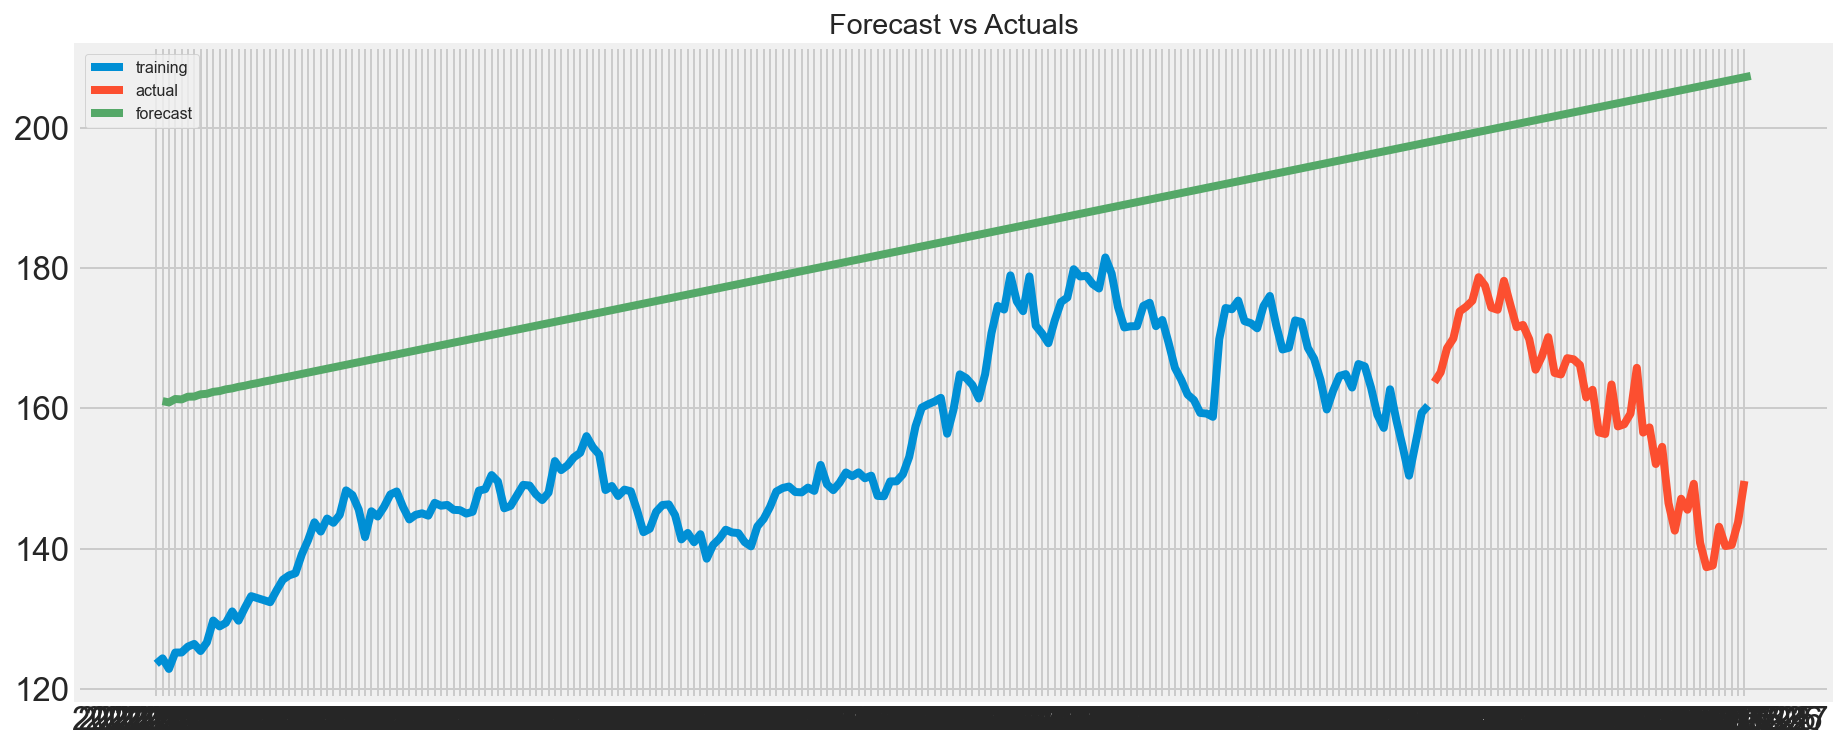

In [273]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_series, label='forecast',color ="g")
8plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# With the predicted prices I will calculate the returns 

In [299]:
fc=forecast_series.to_frame()
fc

,0
1,161.028731
2,160.840519
3,161.330531
4,161.268064
5,161.655644
...,...
248,206.653159
249,206.838707
250,207.024255
251,207.209803


In [300]:
fc = fc.rename(columns= {0: "price_t"})
fc.index.name = "t"

In [301]:
fc

,price_t
t,
1,161.028731
2,160.840519
3,161.330531
4,161.268064
5,161.655644
...,...
248,206.653159
249,206.838707
250,207.024255


In [302]:
fc["price_t-1"]=fc["price_t"].shift(1) 
fc.head(5)

,price_t,price_t-1
t,,
1,161.028731,NaN
2,160.840519,161.028731
3,161.330531,160.840519
4,161.268064,161.330531
5,161.655644,161.268064


In [303]:
fc["returns"]= fc["price_t"] / fc["price_t-1"] -1 #calculate returns
fc.head(5)

,price_t,price_t-1,returns
t,,,
1,161.028731,NaN,NaN
2,160.840519,161.028731,-0.001169
3,161.330531,160.840519,0.003047
4,161.268064,161.330531,-0.000387
5,161.655644,161.268064,0.002403


## Value at Risk

In [305]:
fc = fc[["returns"]]
fc.head(5)

,returns
t,
1,NaN
2,-0.001169
3,0.003047
4,-0.000387
5,0.002403


In [310]:
fc.drop([1],inplace = True)

In [312]:
fc.head(3)

,returns
t,
2,-0.001169
3,0.003047
4,-0.000387


In [316]:
fc.count()

returns    251
dtype: int64

In [313]:
var_per = 5
var_95 = np.percentile(fc,var_per)
var_95

0.0009007031830912116

### VaR = 0.0009007031830912116 

In [318]:
cvar_95 = fc[fc <= var_95].mean()
cvar_95

returns    0.000529
dtype: float64

### CVaR = 0.000529